### Smoothed Bathymetry SVB - Domain 06 

Extended domain to the west to test if changing the doamin cahnges the frequency of the peaks in amplitude spectra. Are some of the modes dependent on the domain?

We also flatten the topograpby at the open boundaries so that there are no topography gradients across the open boundaries.

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Make sure to use 2020 data because GEBCO 2021 changes the shape of the 250 m isobath! I don;t know which one is better but for consistenciy use 2020.

Domain 6 is bounded by

* north: 35.3 N 
* south: 27.0 N
* west: -123.0 W (domain 5 ended at -122.0 W)
* east: -114.0 W

Other considerations
* Bottom depth flattened to -5000 m. 
* Land set to 0 m. - fixed small puddles on land.
* Erased some weird artifacts from the measurement tracks.
* No Ojo de Liebre lagoon

Grid
* Horizontal resolution: $\Delta$lon -0.015625 deg (~1.42 km S-1.55 km N) and $\Delta$lat 0.0136 (1.503 km N and S)
* nx=576, ny=612, nz=100, 

OPEN BOUNDARIES: North, West and South

In [38]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [40]:
nc_file = '../../bathy/GEBCO_SVB/GEBCO_2020_26_Feb_2022_37efbe9660db/gebco_2020_n37.0_s26.0_w-125.0_e-112.0.nc'
with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (2640,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (3120,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_pa

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [43]:
for ii,loni in zip(range(len(lon)),lon):
    print(ii,loni)

0 -124.99791666666667
1 -124.99375
2 -124.98958333333334
3 -124.98541666666667
4 -124.98125
5 -124.97708333333333
6 -124.97291666666666
7 -124.96875
8 -124.96458333333334
9 -124.96041666666667
10 -124.95625000000001
11 -124.95208333333333
12 -124.94791666666666
13 -124.94375
14 -124.93958333333333
15 -124.93541666666667
16 -124.93125
17 -124.92708333333334
18 -124.92291666666667
19 -124.91875
20 -124.91458333333333
21 -124.91041666666666
22 -124.90625
23 -124.90208333333334
24 -124.89791666666667
25 -124.89375000000001
26 -124.88958333333333
27 -124.88541666666666
28 -124.88125
29 -124.87708333333333
30 -124.87291666666667
31 -124.86875
32 -124.86458333333334
33 -124.86041666666667
34 -124.85625
35 -124.85208333333333
36 -124.84791666666666
37 -124.84375
38 -124.83958333333334
39 -124.83541666666667
40 -124.83125000000001
41 -124.82708333333333
42 -124.82291666666666
43 -124.81875
44 -124.81458333333333
45 -124.81041666666667
46 -124.80625
47 -124.80208333333334
48 -124.79791666666667


910 -121.20625000000001
911 -121.20208333333333
912 -121.19791666666666
913 -121.19375
914 -121.18958333333333
915 -121.18541666666667
916 -121.18125
917 -121.17708333333334
918 -121.17291666666667
919 -121.16875
920 -121.16458333333333
921 -121.16041666666666
922 -121.15625
923 -121.15208333333334
924 -121.14791666666667
925 -121.14375000000001
926 -121.13958333333333
927 -121.13541666666666
928 -121.13125
929 -121.12708333333333
930 -121.12291666666667
931 -121.11875
932 -121.11458333333334
933 -121.11041666666667
934 -121.10625
935 -121.10208333333333
936 -121.09791666666666
937 -121.09375
938 -121.08958333333334
939 -121.08541666666667
940 -121.08125000000001
941 -121.07708333333333
942 -121.07291666666666
943 -121.06875
944 -121.06458333333333
945 -121.06041666666667
946 -121.05625
947 -121.05208333333334
948 -121.04791666666667
949 -121.04375
950 -121.03958333333333
951 -121.03541666666666
952 -121.03125
953 -121.02708333333334
954 -121.02291666666667
955 -121.01875000000001
956 

1553 -118.52708333333334
1554 -118.52291666666667
1555 -118.51875000000001
1556 -118.51458333333333
1557 -118.51041666666666
1558 -118.50625
1559 -118.50208333333333
1560 -118.49791666666667
1561 -118.49375
1562 -118.48958333333334
1563 -118.48541666666667
1564 -118.48125
1565 -118.47708333333333
1566 -118.47291666666666
1567 -118.46875
1568 -118.46458333333334
1569 -118.46041666666667
1570 -118.45625000000001
1571 -118.45208333333333
1572 -118.44791666666666
1573 -118.44375
1574 -118.43958333333333
1575 -118.43541666666667
1576 -118.43125
1577 -118.42708333333334
1578 -118.42291666666667
1579 -118.41875
1580 -118.41458333333333
1581 -118.41041666666666
1582 -118.40625
1583 -118.40208333333334
1584 -118.39791666666667
1585 -118.39375000000001
1586 -118.38958333333333
1587 -118.38541666666666
1588 -118.38125
1589 -118.37708333333333
1590 -118.37291666666667
1591 -118.36875
1592 -118.36458333333334
1593 -118.36041666666667
1594 -118.35625
1595 -118.35208333333333
1596 -118.34791666666666

2159 -116.00208333333333
2160 -115.99791666666667
2161 -115.99375
2162 -115.98958333333333
2163 -115.98541666666667
2164 -115.98125
2165 -115.97708333333334
2166 -115.97291666666666
2167 -115.96875
2168 -115.96458333333334
2169 -115.96041666666667
2170 -115.95625
2171 -115.95208333333333
2172 -115.94791666666667
2173 -115.94375
2174 -115.93958333333333
2175 -115.93541666666667
2176 -115.93125
2177 -115.92708333333333
2178 -115.92291666666667
2179 -115.91875
2180 -115.91458333333334
2181 -115.91041666666666
2182 -115.90625
2183 -115.90208333333334
2184 -115.89791666666667
2185 -115.89375
2186 -115.88958333333333
2187 -115.88541666666667
2188 -115.88125
2189 -115.87708333333333
2190 -115.87291666666667
2191 -115.86875
2192 -115.86458333333333
2193 -115.86041666666667
2194 -115.85625
2195 -115.85208333333334
2196 -115.84791666666666
2197 -115.84375
2198 -115.83958333333334
2199 -115.83541666666667
2200 -115.83125
2201 -115.82708333333333
2202 -115.82291666666667
2203 -115.81875
2204 -115.

2909 -112.87708333333333
2910 -112.87291666666667
2911 -112.86875
2912 -112.86458333333333
2913 -112.86041666666667
2914 -112.85625
2915 -112.85208333333334
2916 -112.84791666666666
2917 -112.84375
2918 -112.83958333333334
2919 -112.83541666666667
2920 -112.83125
2921 -112.82708333333333
2922 -112.82291666666667
2923 -112.81875
2924 -112.81458333333333
2925 -112.81041666666667
2926 -112.80625
2927 -112.80208333333333
2928 -112.79791666666667
2929 -112.79375
2930 -112.78958333333334
2931 -112.78541666666666
2932 -112.78125
2933 -112.77708333333334
2934 -112.77291666666667
2935 -112.76875
2936 -112.76458333333333
2937 -112.76041666666667
2938 -112.75625
2939 -112.75208333333333
2940 -112.74791666666667
2941 -112.74375
2942 -112.73958333333333
2943 -112.73541666666667
2944 -112.73125
2945 -112.72708333333334
2946 -112.72291666666666
2947 -112.71875
2948 -112.71458333333334
2949 -112.71041666666667
2950 -112.70625
2951 -112.70208333333333
2952 -112.69791666666667
2953 -112.69375
2954 -112.

In [44]:
## Set domain corners
lon1 = 480
lon2 = 2640
lat1 = 240
lat2 = 2232

## Flatten out bottom at 5000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -5000] = -5000

## Flatten out NE corner in the Gulf of California
elev[lat2-640:lat2+3, lon2-550:lon2+3] = 0
elev[lat2-1110:lat2-640, lon2-300:lon2+3] = 0
elev[lat2-1375:lat2-640, lon2-200:lon2+3] = 0
elev[lat2-760:lat2+3, lon2-430:lon2+3] = 0

## Remove Ojo de Liebre lagoon
elev[lat1+145:lat1+180, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+210, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+225, lon2-75:lon2+3] = 0


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


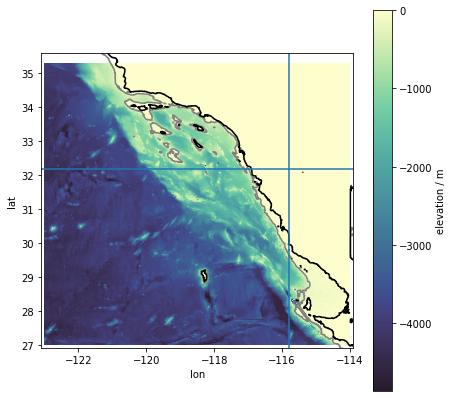

In [45]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2],
                   cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
ax.axhline(lat[lat2-750])
ax.axvline(lon[lon2-430])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-123.1,-113.9)
ax.set_ylim(26.9,35.6)
ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -5000 m (max depth found is 5083 m).  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [46]:
nx = 576
ny = 612

lon_vect = np.round(np.linspace(-123.0,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(27.0,35.3,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [47]:
bathy = f_interp(lon_vect,lat_vect)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


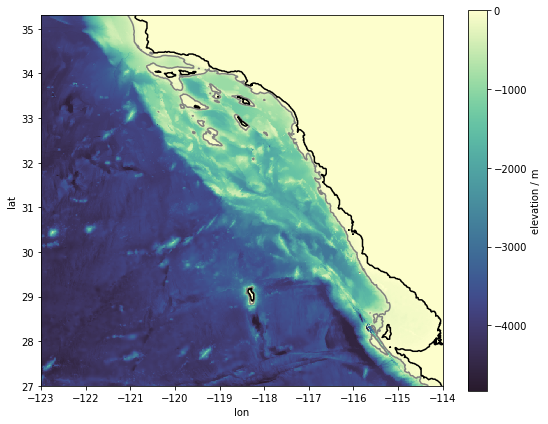

In [48]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [49]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [50]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
#smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


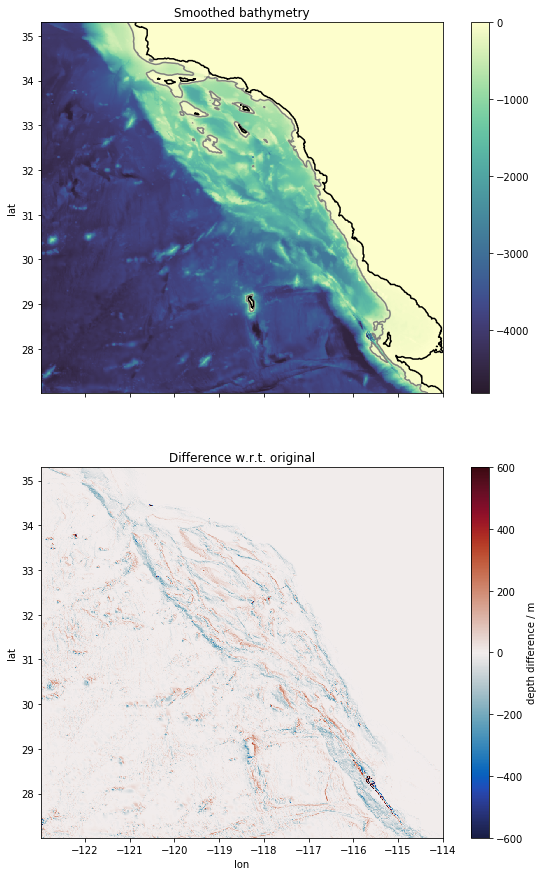

In [51]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Final clean up

Remove 1-cell islands and puddles on land

In [52]:
smooth_bathy[358,116]=smooth_bathy[358,117]
# uff, there's lots to fix...

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':


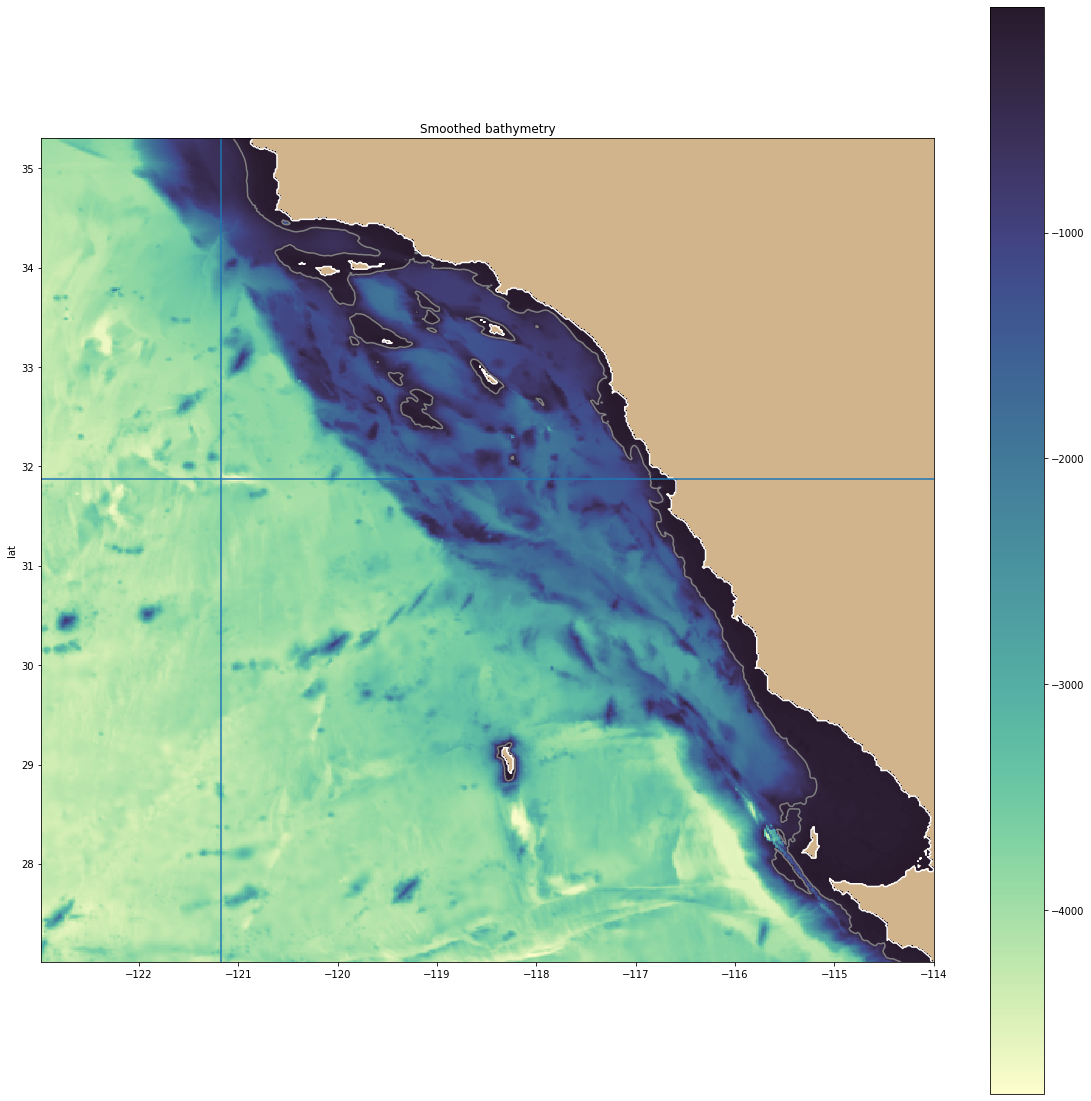

In [53]:
fig, (ax) = plt.subplots(1,1,figsize=(20,20), sharex=True)
mask_smooth = np.ma.masked_values(smooth_bathy,0)
mask = np.ma.getmask(mask_smooth)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], np.ma.masked_array(smooth_bathy, mask=mask), cmap=cmo.cm.deep)

cb = plt.colorbar(pc, ax=ax)
ax.axvline(lon_vect[117])
ax.axhline(lat_vect[359])

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='w', levels=[0])
ax.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax.set_aspect(1)


### SMOOTH 

In [54]:
def smoothgrid(h,hmin,hmax,hmax_coast,rmax,n_filter_deep_topo,n_filter_final):
    '''Function adapted from 
       https://rydsphd.wordpress.com/2011/09/20/smoothing-function-used-for-bathymetry/
       Smooth the topography to get a maximum r factor = rmax.
       
       h: np. array (bathymetry, positive)
       hmin: float, cutoff value of bathymetry (0 m)
       hmax: float, max depth at which to cut off bathymetry (5000 m)
       n_filter_deep_topo: Number of pass of a selective filter to reduce the isolated 
                           seamounts on the deep ocean.
       n_filter_final: Number of pass of a single hanning filter at the end of the
                       procedure to ensure that there is no 2DX noise in the topography.
       Further Information: http://www.brest.ird.fr/Roms_tools/

       Updated    Aug-2006 by Pierrick Penven'''

    # Chop the topography at min and max values
    h[h<hmin] = hmin
    h[h>hmax] = hmax
    
    # Step 1: Deep Ocean Filter (remove isolated seamounts)
    if n_filter_deep_topo >= 1:
    #  Build a smoothing coefficient that is a linear function
    #  of a smooth topography.
        coef=h.copy()
        for i in range(8):
            coef=hanning_smoother(coef)    # coef is a smoothed bathy
        coef=0.125*(coef/np.nanmax(coef))     # rescale the smoothed bathy
    
        for i in range(n_filter_deep_topo):
            h=hanning_smoother_coef2d(h,coef)     # smooth with avariable coef
            h[h<hmax_coast] = hmax_coast

    # Apply a selective filter on log(h) to reduce grad(h)/h.
    h = rotfilter(h,hmax_coast,rmax)

    # Smooth the topography again to prevent 2D noise
    if n_filter_final > 1:
        for i in range(n_filter_final):
            h=hanning_smoother(h)
            #h[h>hmax_coast]=hmax_coast
    h[h<hmin]=hmin
    return(h)

def hanning_smoother(h):
    M,L = np.shape(h)[0], np.shape(h)[1]
    Mm = M-1
    Mmm = M-2
    Lm = L-1
    Lmm = L-2

    h[1:Mm,1:Lm]=0.125*(h[0:Mmm,1:Lm]+h[2:M,1:Lm]+
                        h[1:Mm,0:Lmm]+h[1:Mm,2:]+
                        4*h[1:Mm,1:Lm])
    h[0,:]=h[1,:]
    h[M-1,:]=h[Mm-1,:]
    h[:,0]=h[:,1]
    h[:,L-1]=h[:,Lm-1]
    return(h)

def hanning_smoother_coef2d(h,coef):
    M,L = np.shape(h)[0], np.shape(h)[1]
    Mm = M-1
    Mmm = M-2
    Lm = L-1
    Lmm = L-2
    h[1:Mm,1:Lm]=(coef[1:Mm,1:Lm]*(h[0:Mmm,1:Lm]+h[2:M,1:Lm]+
                                  h[1:Mm,0:Lmm]+h[1:Mm,2:L])+
                  (np.ones(np.shape(coef[1:Mm,1:Lm]))-4.*coef[1:Mm,1:Lm])*h[1:Mm,1:Lm])

    h[0,:]=h[1,:]
    h[M-1,:]=h[Mm-1,:]
    h[:,0]=h[:,1]
    h[:,L-1]=h[:,Lm-1]
    return(h)

def rfact(h):
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm = M-1
    Mmm = M-2
    Lm = L-1
    Lmm = L-2
    rx=abs(h[0:M,1:L]-h[0:M,0:Lm])/(h[0:M,1:L]+h[0:M,0:Lm])
    ry=abs(h[1:M,0:L]-h[0:Mm,0:L])/(h[1:M,0:L]+h[0:Mm,0:L])
    return(rx,ry)

def FX(h):
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm=M-1
    Mmm=M-2
    Lm=L-1
    Lmm=L-2

    fx[1:Mm,:]=((h[1:Mm,1:L]-h[1:Mm,0:Lm])*5/6 +
                (h[0:Mmm,1:L]-h[0:Mmm,0:Lm]+h[2:M,1:L]-h[2:M,0:Lm])/12)

    fx[0,:]=fx[1,:]
    fx[M-1,:]=fx[Mm-1,:]
    return(fx)

def FY(h):
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm=M-1
    Mmm=M-2
    Lm=L-1
    Lmm=L-2

    fy[:,1:Lm]=((h[1:M,1:Lm]-h[0:Mm,1:Lm])*5/6 +
                (h[1:M,0:Lmm]-h[0:Mm,0:Lmm]+h[1:M,2:L]-h[1:Mm,2:L])/12)
      
    fy[:,0]=fy[:,1]
    fy[:,L-1]=fy[:,Lm-1]

    return(fy)

def rotfilter(h,hmax_coast,rmax):
    '''Apply a selective filter on log(h) to reduce grad(h)/h.'''
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm=M-1
    Mmm=M-2
    Lm=L-1
    Lmm=L-2
    cff=0.8
    nu=3/16
    rx, ry = rfact(h)
    r = np.max(np.array(np.max(rx),np.max(ry)))
    h=np.log(h)
    #hmax_coast = np.log(hmax_coast)
    i=0
    while r>rmax:
        i=i+1
        cx = float(rx>cff*rmax)
        cx = hanning_smoother(cx)
        cy = float(ry>cff*rmax)
        cy = hanning_smoother(cy)
        fx = cx*FX(h)
        fy = cy*FY(h)
        h[1:Mm,1:Lm]=(h[1:Mm,1:Lm]+
                      nu*((fx[1:Mm,1:Lm]-fx[1:Mm,0:Lmm])+
                          (fy[1:Mm,1:Lm]-fy[0:Mmm,1:Lm])))
        h[0,:] = h[1,:]
        h[M-1,:] = h[M-1,:]
        h[:,0] = h[:,1]
        h[:,L-1] = h[:,Lm-1]
        #h[h>hmax_coast] = hmax_coast
        rx, ry = rfact(np.exp(h))
        r = np.max(np.array(np.max(rx),np.max(ry)))
    h = np.exp(h)
    return(h)



In [55]:
# deep filter = 10
hmin = 0
hmax = 5000
hmax_coast = 0
rmax = 0.5
n_filter_deep_topo = 10
n_filter_final = 1
h2 = -smooth_bathy.copy()
HH = smoothgrid(h2,hmin,hmax,hmax_coast,rmax,n_filter_deep_topo,n_filter_final)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in log


In [56]:
# deep filter = 100

hmin = 0
hmax = 5000
hmax_coast = 0
rmax = 0.5
n_filter_deep_topo = 100
n_filter_final = 1
h3 = -smooth_bathy.copy()
HH2 = smoothgrid(h3,hmin,hmax,hmax_coast,rmax,n_filter_deep_topo,n_filter_final)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in log


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: No contour levels were found within the data range.
  del sys.path[0]
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: No contour levels were found within the data range.


Text(0.5, 1.0, 'smoothed x 100 - original')

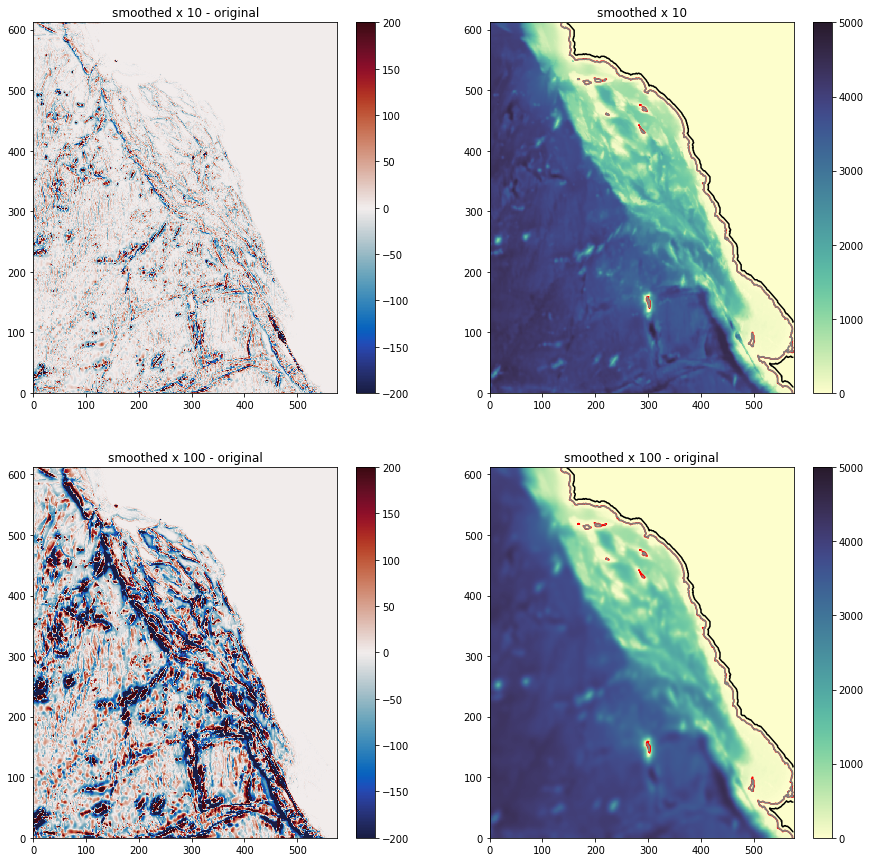

In [57]:
fig,((ax,axx),(ax2,ax3)) = plt.subplots(2,2, figsize=(15,15))

pc = ax.pcolormesh(HH-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-200, vmax=200)
plt.colorbar(pc, ax=ax)
ax.set_title('smoothed x 10 - original')

pc2 = ax2.pcolormesh(HH2-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-200, vmax=200)
plt.colorbar(pc2,ax=ax2)
ax2.set_title('smoothed x 100 - original')

pcx = axx.pcolormesh(HH, cmap=cmo.cm.deep, vmin=0, vmax=5000)
axx.contour(-smooth_bathy, levels=[0], colors='r')
axx.contour(HH, levels=[0], colors='k')
axx.contour(HH, levels=[0.1], colors='0.5')
plt.colorbar(pcx,ax=axx)
axx.set_title('smoothed x 10')

pc3 = ax3.pcolormesh(HH2, cmap=cmo.cm.deep, vmin=0, vmax=5000)
ax3.contour(-smooth_bathy, levels=[0], colors='r')
ax3.contour(HH2, levels=[0], colors='k')
ax3.contour(HH2, levels=[0.1], colors='0.5')
plt.colorbar(pc3,ax=ax3)
ax3.set_title('smoothed x 100 - original')

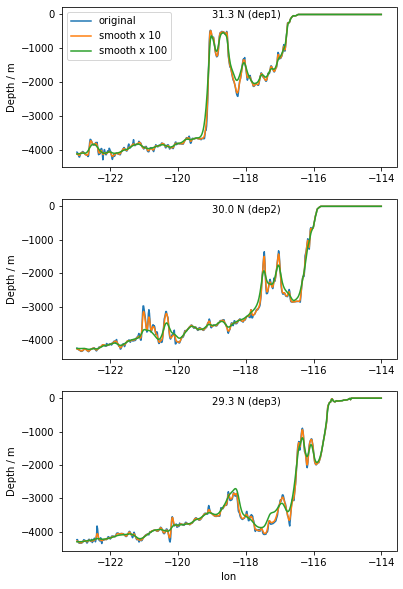

In [58]:
fig, (ax1,ax2, ax3) = plt.subplots(3,1,figsize=(6,10))

lon_ind = 255
lat_ind1 = 70
lat_ind2 = 120
lon_ind_st = 10

# Cross-shelf bathymetry profiles OG
dep1 = smooth_bathy[lat_ind2+200,:]
dep2 = smooth_bathy[lat_ind2+100,:]
dep3 = smooth_bathy[lat_ind2+50,:]
ax1.plot(lon_vect[1:],dep1, label='original')
ax2.plot(lon_vect[1:],dep2, label='original')
ax3.plot(lon_vect[1:],dep3, label='original')

# Cross-shelf bathymetry profiles HH
dep1 = -HH[lat_ind2+200,:]
dep2 = -HH[lat_ind2+100,:]
dep3 = -HH[lat_ind2+50,:]
ax1.plot(lon_vect[1:],dep1, label='smooth x 10')
ax2.plot(lon_vect[1:],dep2, label='smooth x 10')
ax3.plot(lon_vect[1:],dep3, label='smooth x 10')

# Cross-shelf bathymetry profiles HH2
dep1 = -HH2[lat_ind2+200,:]
dep2 = -HH2[lat_ind2+100,:]
dep3 = -HH2[lat_ind2+50,:]
ax1.plot(lon_vect[1:],dep1, label='smooth x 100')
ax2.plot(lon_vect[1:],dep2, label='smooth x 100')
ax3.plot(lon_vect[1:],dep3, label='smooth x 100')

ax1.text(-119,-100,'%1.1f N (dep1)' %lat_vect[lat_ind2+200])
ax2.text(-119,-200,'%1.1f N (dep2)' %lat_vect[lat_ind2+100])
ax3.text(-119,-200,'%1.1f N (dep3)' %lat_vect[lat_ind2+50])

ax3.set_xlabel('lon')
ax1.set_ylabel('Depth / m')
ax2.set_ylabel('Depth / m')
ax3.set_ylabel('Depth / m')

ax1.legend(ncol=1)


In [59]:
HH_fix = HH.copy()
HH_fix[HH_fix<0.1] = 0

HH2_fix = HH2.copy()
HH2_fix[HH2_fix<0.1] = 0

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: No contour levels were found within the data range.
  from ipykernel import kernelapp as app
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


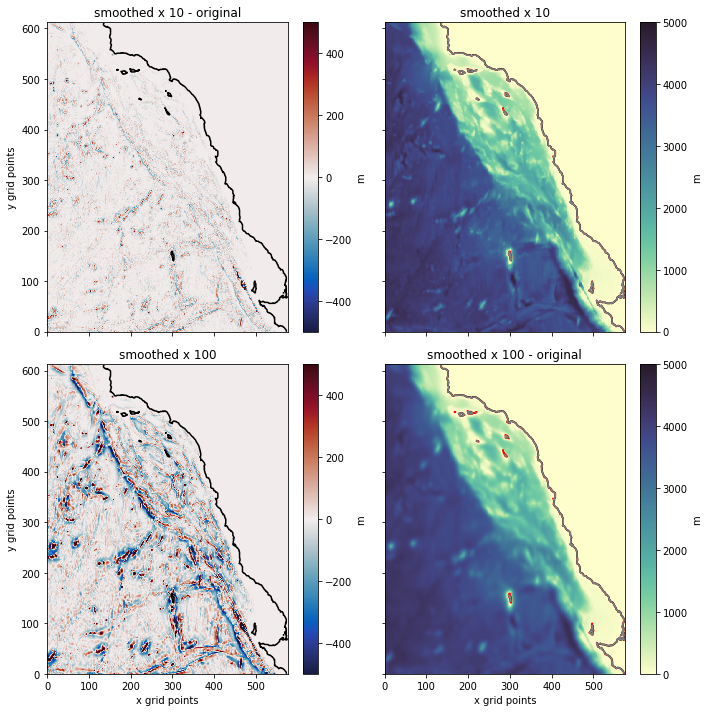

In [60]:
fig,((ax,axx),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)

pc = ax.pcolormesh(HH_fix-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-500, vmax=500)
plt.colorbar(pc, ax=ax, label='m')
ax.contour(-smooth_bathy, levels=[0], colors='k')
ax.set_title('smoothed x 10 - original')

pc2 = ax2.pcolormesh(HH2_fix-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-500, vmax=500)
plt.colorbar(pc2,ax=ax2, label='m')
ax2.contour(-smooth_bathy, levels=[0], colors='k')
ax2.set_title('smoothed x 100')

pcx = axx.pcolormesh(HH_fix, cmap=cmo.cm.deep, vmin=0, vmax=5000)
axx.contour(-smooth_bathy, levels=[0], colors='r')
axx.contour(HH_fix, levels=[0], colors='k')
axx.contour(HH_fix, levels=[0.1], colors='0.5')
plt.colorbar(pcx,ax=axx, label='m')
axx.set_title('smoothed x 10')

pc3 = ax3.pcolormesh(HH2_fix, cmap=cmo.cm.deep, vmin=0, vmax=5000)
ax3.contour(-smooth_bathy, levels=[0], colors='r')
ax3.contour(HH2_fix, levels=[0], colors='k')
ax3.contour(HH2_fix, levels=[0.1], colors='0.5')
plt.colorbar(pc3,ax=ax3, label='m')
ax3.set_title('smoothed x 100 - original')
ax3.set_xlabel('x grid points')
ax2.set_xlabel('x grid points')
ax2.set_ylabel('y grid points')
ax.set_ylabel('y grid points')
plt.tight_layout()

### Flatten topo at open boundaries

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: No contour levels were found within the data range.
  app.launch_new_instance()
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


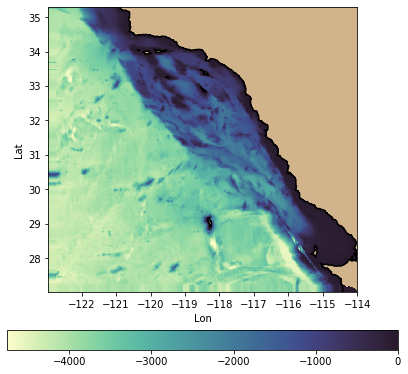

In [61]:
for ii in range(15):
    smooth_bathy[:,ii] = smooth_bathy[:,15]

for ii in range(15):
    smooth_bathy[ii,:] = smooth_bathy[15,:]

depths_smooth = np.ma.masked_array(smooth_bathy, mask=mask)

# Plot to check
fig, (ax) = plt.subplots(1,1,figsize=(7,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_smooth, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', linewidth=1, levels=[0])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax.set_aspect(1)


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  import sys


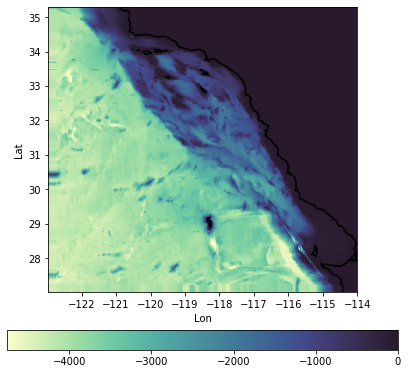

In [62]:
fig, (ax) = plt.subplots(1,1,figsize=(7,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', linewidth=1, levels=[0])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax.set_aspect(1)


### Binary file

In [63]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [64]:
dy

array([0.01356, 0.01356, 0.01357, 0.01356, 0.01356, 0.01356, 0.01356,
       0.01357, 0.01356, 0.01356, 0.01356, 0.01357, 0.01356, 0.01356,
       0.01356, 0.01356, 0.01357, 0.01356, 0.01356, 0.01356, 0.01356,
       0.01357, 0.01356, 0.01356, 0.01356, 0.01356, 0.01357, 0.01356,
       0.01356, 0.01356, 0.01356, 0.01357, 0.01356, 0.01356, 0.01356,
       0.01357, 0.01356, 0.01356, 0.01356, 0.01356, 0.01357, 0.01356,
       0.01356, 0.01356, 0.01356, 0.01357, 0.01356, 0.01356, 0.01356,
       0.01356, 0.01357, 0.01356, 0.01356, 0.01356, 0.01357, 0.01356,
       0.01356, 0.01356, 0.01356, 0.01357, 0.01356, 0.01356, 0.01356,
       0.01356, 0.01357, 0.01356, 0.01356, 0.01356, 0.01356, 0.01357,
       0.01356, 0.01356, 0.01356, 0.01356, 0.01357, 0.01356, 0.01356,
       0.01356, 0.01357, 0.01356, 0.01356, 0.01356, 0.01356, 0.01357,
       0.01356, 0.01356, 0.01356, 0.01356, 0.01357, 0.01356, 0.01356,
       0.01356, 0.01356, 0.01357, 0.01356, 0.01356, 0.01356, 0.01356,
       0.01357, 0.01

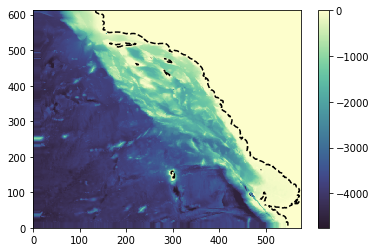

In [67]:
bathy_fname = '576x612/domain6_576x612_SVB_flatBdy_bat.bin'
dx_fname = '576x612/domain6_576x612_flatBdy_SVB_dx.bin'
dy_fname = '576x612/domain6_576x612_flatBdy_SVB_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd=smooth_bathy#-HH2_fix
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.contour(dd, levels=[-1,0], colors='k')
plt.show()

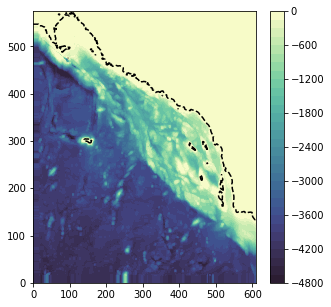

In [68]:
# Check it is read correctly
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
plt.colorbar(pc,ax=ax)
ax.contour(bF, levels=[-20,0], colors='k')